### <b>Data reminder</b>

In Colab, be sure to upload your <tt>.csv</tt> cleaned data file.

For example, to run the cell below you will need the <tt>iris_cleaned.csv</tt> file -- it's [here](https://drive.google.com/drive/folders/1Qnie8N2VCdumwaFxFldJ_1iQmvtb40pZ?usp=drive_link)

Download it to your machine and then upload it to Colab into the _folder_ &nbsp; icon at left.

In [ ]:
#
# Modern modeling ~ iris_modeler:  All-in-one iris clasification via DT + RF
#

### Iris classification via <b>Decision Trees</b> (here) and Random Forests (below)

This is the whole ML workflow! You can show/no-show parts with <tt>if True</tt> and <tt>if False</tt>

+ Section 1: Library imports
+ Section 2: Read the already-cleaned iris data  (it's [here](https://drive.google.com/drive/folders/1Qnie8N2VCdumwaFxFldJ_1iQmvtb40pZ?usp=drive_link) as <tt>iris_cleaned.csv</tt>)
+ Section 3:  Drop any columns we don't want to use
+ Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
+ Section 5:  convert from pandas (spreadsheet) to numpy (array)
+ Section 6:  define our features (X_all) and our target-to-predict (y_all)
+ Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
+ Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
+ Section 9:  Let's see how our model does on the TEST data...
+ Section 10:  Let's cross-validate to find the "best" depth
+ Section 11:  Let's build a final model + find _feature importances_

## First, <b>Decision Trees</b>

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "iris_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('irisname', axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print("Created and trained a classifier with best_depth =", best_depth)

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = dtree_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_depth = 1   # we don't know what depth to use, so let's guess 1 (not a good guess)
best_accuracy = 0.0  # also not correct...
for depth in range(1,6):    # Note that we are cross-validating using only our TRAINING data!
    dtree_cv_model = tree.DecisionTreeClassifier(max_depth=depth)   # build a knn_model for every k
    cv_scores = cross_val_score( dtree_cv_model, X_train, y_train, cv=5 )  # cv=5 means 80/20
    this_cv_accuracy = cv_scores.mean()               # mean() is numpy's built-in average function
    if False: print(f"depth: {depth:2d}  cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:  # is this one better?
        best_accuracy = this_cv_accuracy  # track the best accuracy
        best_depth = depth                        # with the best k
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)   # dramatic pauses!
if True: print(f"best_depth = {best_depth}  \n    yields the highest cv accuracy: {best_accuracy}\n")  # print the best one

# Section 11:  Here's where the model-building happens with the best-found parameters:
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model_final.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("Created and trained a classifier with best_depth =", best_depth)
# print the feature importances...
if False:  print("\nThe feature importances are", dtree_model_final.feature_importances_)

Cross-validating...
best_depth = 3  
    yields the highest cv accuracy: 0.9462450592885375

Created and trained a classifier with best_depth = 3


### Optional:  Let's format things more carefully...

In [ ]:
#
# Let's print things in a vertical table
#

def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {SPECIES[p]:>12s} {SPECIES[a]:<12s}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out!  use the model you want:
predicted_labels = dtree_model_final.predict(X_test)      # THIS IS THE KEY LINE:  predict
compare_labels(predicted_labels,actual_labels)


row   # :    predicted actual         result
row   0 :   versicolor versicolor     
row   1 :    virginica virginica      
row   2 :    virginica virginica      
row   3 :    virginica virginica      
row   4 :    virginica virginica      
row   5 :    virginica virginica      
row   6 :   versicolor versicolor     
row   7 :       setosa setosa         
row   8 :       setosa setosa         
row   9 :    virginica versicolor     incorrect
row  10 :   versicolor versicolor     
row  11 :    virginica virginica      
row  12 :   versicolor versicolor     
row  13 :   versicolor versicolor     
row  14 :       setosa setosa         
row  15 :    virginica virginica      
row  16 :    virginica virginica      
row  17 :    virginica virginica      
row  18 :       setosa setosa         
row  19 :   versicolor versicolor     
row  20 :   versicolor versicolor     
row  21 :   versicolor versicolor     
row  22 :    virginica versicolor     incorrect
row  23 :    virginica virginica      


27

Optional: See the Decision tree...

file tree_data.gv written. Try pasting its contents to  http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petalwid <= 0.8\ngini = 0.667\nsamples = 141\nvalue = [47.0, 46.0, 48.0]\nclass = virginica", fillcolor="#fefdff"] ;
1 [label="gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="petalwid <= 1.75\ngini = 0.5\nsamples = 94\nvalue = [0.0, 46.0, 48.0]\nclass = virginica", fillcolor="#faf7fe"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petallen <= 4.95\ngini = 0.18\nsamples = 50\nvalue = [0, 45, 5]\nclass = versicolor", fillcolor="#4fe88f"] ;
2 -> 3 ;
4 [label="gini = 0.044\nsamples = 44\nvalue = [0, 43, 1]\nclass = versicolor", fillcolor="#3ee684"] ;
3 -> 4 ;
5 [label="gini = 0.444\nsamples = 6\nvalue = [0, 2,

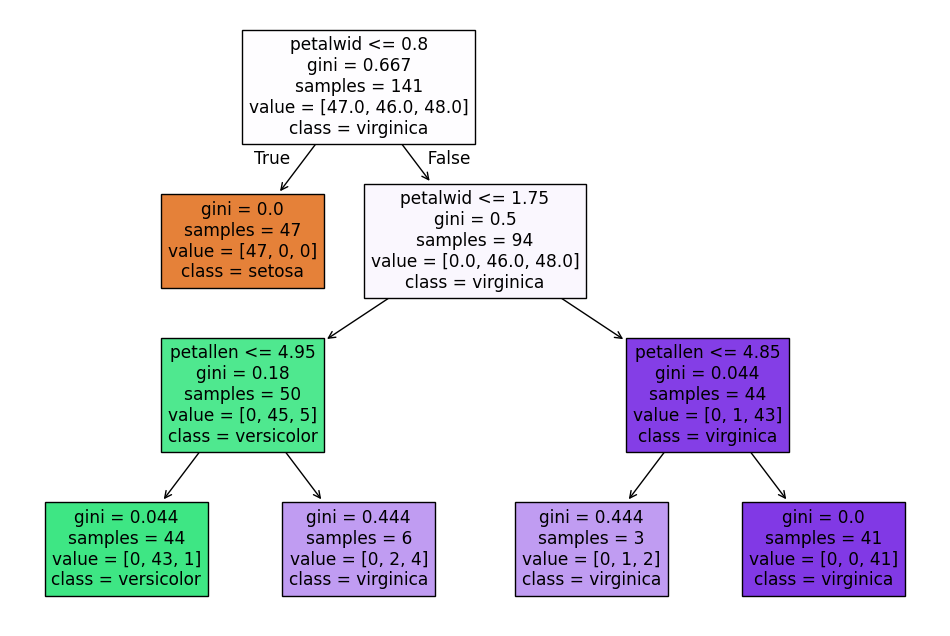

In [ ]:
import matplotlib.pyplot as plt

FEATURES = COLUMNS[0:4]

#
# Now, let's see the tree!
#

filename = 'tree_data.gv'    # sometimes .dot is used, instead of .gv
model = dtree_model_final

tree.export_graphviz(model, out_file=filename,  # the filename constructed above...!
                            feature_names=COLUMNS[:-1], # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try pasting its contents to  http://viz-js.com/\n")

with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

#
# Tree display...
#
fig = plt.figure(figsize=(12,8))
tree_plot = tree.plot_tree(model,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True)

plt.show()

### Optional:  Use the predictive model!

We can use the predictive model to make predictions and try it out!

In [ ]:
#
# Ok!  We have our model, let's use it...
#
# ... in a data-trained predictive model (k-nearest-neighbors), using scikit-learn
#
# warning: this model has NOT yet been tuned to its "best k"
#
def predictive_model( Features, model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                      # extra brackets needed so it's 2d
    predicted_species_list = model.predict(our_features)   # PREDICT!

    predicted_species = int(round(predicted_species_list[0]))  # unpack the one element it contains
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
ListofFeatures = [ [4.2,3.1,2.0,0.4],
                   [5.8,2.7,4.1,1.0],
                   [4.6,3.6,3.0,2.2],
                   [6.7,3.3,5.7,2.1],
                   [4.2,4.2,4.2,4.2],
                   [1.0,42,4.7,0.01],        # -4.7? .01?  0?
                   ]

for Features in ListofFeatures:
    predicted_species = predictive_model( Features, dtree_model_final )
    name = SPECIES[predicted_species]                          # look up the species
    print(f"From the Features {Features}, I predict : {name}")

From the Features [4.2, 3.1, 2.0, 0.4], I predict : setosa
From the Features [5.8, 2.7, 4.1, 1.0], I predict : versicolor
From the Features [4.6, 3.6, 3.0, 2.2], I predict : virginica
From the Features [6.7, 3.3, 5.7, 2.1], I predict : virginica
From the Features [4.2, 4.2, 4.2, 4.2], I predict : virginica
From the Features [1.0, 42, 4.7, 0.01], I predict : setosa


### Predictive models aren't perfect!
+ Notice that the fourth prediction above is (probably) wrong
  + It probably predicted _versicolor_, but it was actually a _virginica_
  + In essence, it was a _virginica_ iris that "looked more like" a _versicolor_ ... ***from these four features!***
  + A botanist would use more than these four features to classify difference species...

+ **Key**: Even when the modeling process runs "perfectly," the models are likely to be imperfect...
+ ... it's just that we won't know where the imperfections are -- until future observations arrive!

### That's it! Our model is complete...

... not perfect, but **complete**

What does this mean?

It means that the model -- the function (above) -- is ***already*** prepared to provide an output for every possible input!

We can see this in a plot of the outputs for every input in the "sepal" plane (length vs. width) as well as the "petal" plane:

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 4.0
sepalwid = 2.0
# petallen =
# petalwid =

VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = dtree_model_final


col = 0
row = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the lower-left corner

..........................................
......................................
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


Remember our species-to-number mapping:
0 - setosa
1 - versicolor
2 - virginica


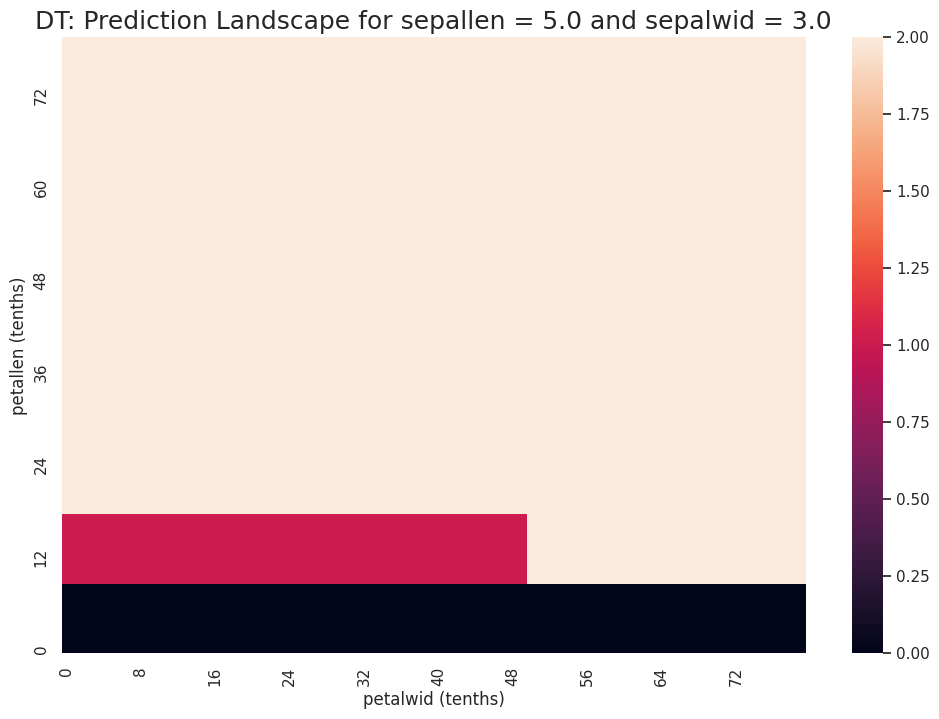

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

sns.set(rc = {'figure.figsize':(12,8)})  # figure size!
ax = sns.heatmap(PLANE)
ax.invert_yaxis() # to match our usual direction
ax.set(xlabel="petalwid (tenths)", ylabel="petallen (tenths)")
ax.set_xticks(ax.get_xticks()[::4])
ax.set_yticks(ax.get_yticks()[::4])
ax.set_title("DT: Prediction Landscape for sepallen = 5.0 and sepalwid = 3.0", fontsize=18)


print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

<br>
<hr>
<br>

## Next, <b>Random Forests</b>

Random Forests are simply a LOT of decision trees...

After you have a lot of decision trees, they all vote on how to classify a new input observation!

The Machine Learning workflow is exactly the same: only the algorithm name changes:

### Iris classification via Decision Trees (above) and <b>Random Forests</b> (here)

This is simply a repeat of whole ML workflow, because it's an amazing advantage to have the whole process in mind! (No harm in repeating it here!) You can show/no-show parts with <tt>if True</tt> and <tt>if False</tt>

+ Section 1: Library imports
+ Section 2: Read the already-cleaned iris data  (you're set - you used it above)
+ Section 3:  Drop any columns we don't want to use
+ Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
+ Section 5:  convert from pandas (spreadsheet) to numpy (array)
+ Section 6:  define our features (X_all) and our target-to-predict (y_all)
+ Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
+ Section 8:  Here's where the model-building happens!  First, we guess at the parameters (k=84)
+ Section 9:  Let's see how our model does on the TEST data...
+ Section 10:  Let's cross-validate to find the "best" depth
+ Section 11:  Let's build a final model + find _feature importances_

In [ ]:
# Section 1:  Libraries
#
import time
import sklearn          # if not present, use a variant of  !pip3 install -U scikit-learn
import numpy as np      # numpy is Python's "array" library
import pandas as pd     # Pandas is Python's "data" library ("dataframe" == spreadsheet)

# Section 2:  Read the already-cleaned data  (+ view, if you wish)
#
cleaned_filename = "iris_cleaned.csv"     # data should be "tidy" already...
df_tidy = pd.read_csv(cleaned_filename)   # can add encoding="utf-8" if needed
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3:  Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop('irisname', axis=COLUMN )
if False:  print("df_model1 is\n", df_model1)

# Section 4:  create COLUMNS and SPECIES variables to show we're organized + know what's happening...
COLUMNS = df_model1.columns                     # int to str
SPECIES = ['setosa','versicolor','virginica']   # int to str
SPECIES_INDEX = { s:i for i,s in enumerate(SPECIES) }  # str to int   {'setosa':0,'versicolor':1,'virginica':2}
COLUMNS_INDEX = { c:i for i,c in enumerate(COLUMNS) }  # str to int   {'sepallen':0,'sepalwid':1,'petallen':2, <more> }
if False:  print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {SPECIES = } \n {SPECIES_INDEX = }")

# Section 5:  convert from pandas (spreadsheet) to numpy (array)
A = df_model1.to_numpy()    # yields the underlying numpy array
A = A.astype('float64')     # make sure everything is floating-point
NUM_ROWS, NUM_COLS = A.shape   # let's have NUM_ROWS and NUM_COLS around
if False:  print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6:  define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:4]  # X (features) WATCH OUT! This is likely to change from model to model...
y_all = A[:,4]    # y (labels) WATCH OUT! This is likely to change from model to model...
if False:
    print(f"The labels/species are \n {y_all} \n ");
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7:  80/20 split into training and testing sets:  X_train and y_train, X_test and y_test
from sklearn.model_selection import train_test_split      # this function splits into training + testing sets
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42 # 20% testing
if False:
    print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8:  Here's where the model-building happens!  First, we guess at the parameters
from sklearn import tree      # for decision trees
from sklearn import ensemble  # for random forests, an ensemble classifier
best_d = 1            # we don't know what depth to use, so let's guess 1 (not a good guess)
best_num_trees = 42   # we don't know how many trees to use, so let's guess 42
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d, n_estimators=best_num_trees, max_samples=0.5)  # 0.5 of the data each tree
rforest_model.fit(X_train, y_train)      # we train the model ... it's one line!
if False:  print(f"Built a Random Forest with depth={best_d} and number of trees={best_num_trees}")

# Section 9:  Let's see how our naive model does on the TEST data!
predicted_labels = rforest_model.predict(X_test)      # THIS IS THE KEY LINE:  predict
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual  labels  :", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set:  {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10:  Let's cross-validate to find the "best" value of k, best_k:
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_d = 1         # range(1,6)
best_num_trees = 50   # [50,150,250]
best_accuracy = 0
for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d, n_estimators=ntrees,max_samples=0.5)
        cv_scores = cross_val_score( rforest_model, X_train, y_train, cv=5 ) # 5 means 80/20 split
        average_cv_accuracy = cv_scores.mean()  # more likely, only their average
        if True: print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy;   best_d = d;      best_num_trees = ntrees
if True: print(f"best_depth: {best_depth} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

# Section 11:  Here's where the model-building happens with the best-found parameters:
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_depth, n_estimators=best_num_trees, max_samples=0.5)
rforest_model_tuned.fit(X_all, y_all)      # we train the model ... on _all_ the data!
if True:  print("Created and trained a classifier with best_depth =", best_depth)
# print the feature importances...
if False:  print("\nThe feature importances are", rforest_model_tuned.feature_importances_)

Cross-validating...
depth:  1 ntrees:  50 cv accuracy:  0.9731
depth:  1 ntrees: 150 cv accuracy:  0.9731
depth:  1 ntrees: 250 cv accuracy:  0.9822
depth:  2 ntrees:  50 cv accuracy:  0.9735
depth:  2 ntrees: 150 cv accuracy:  0.9644
depth:  2 ntrees: 250 cv accuracy:  0.9822
depth:  3 ntrees:  50 cv accuracy:  0.9735
depth:  3 ntrees: 150 cv accuracy:  0.9822
depth:  3 ntrees: 250 cv accuracy:  0.9735
depth:  4 ntrees:  50 cv accuracy:  0.9822
depth:  4 ntrees: 150 cv accuracy:  0.9731
depth:  4 ntrees: 250 cv accuracy:  0.9822
depth:  5 ntrees:  50 cv accuracy:  0.9640
depth:  5 ntrees: 150 cv accuracy:  0.9822
depth:  5 ntrees: 250 cv accuracy:  0.9822
best_depth: 3 and best_num_trees: 250 are our choices. Acc: 0.982213438735178
Created and trained a classifier with best_depth = 3


One of the forest's trees is DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=313535268)
file rf_tree_028.gv written. Try copying the result to http://viz-js.com/ 

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="petallen <= 2.55\ngini = 0.653\nsamples = 55\nvalue = [25, 17, 28]\nclass = virginica", fillcolor="#f7f2fd"] ;
1 [label="gini = 0.0\nsamples = 20\nvalue = [25, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="sepallen <= 5.75\ngini = 0.47\nsamples = 35\nvalue = [0, 17, 28]\nclass = virginica", fillcolor="#ceb1f5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="petallen <= 4.3\ngini = 0.198\nsamples = 7\nvalue = [0, 8, 1]\nclass = versicolor", fillcolor="#52e891"] ;
2 -> 3 ;
4 [label="gini = 0.0\nsamples = 5\nvalue = [0, 6, 0]\nclass = ver

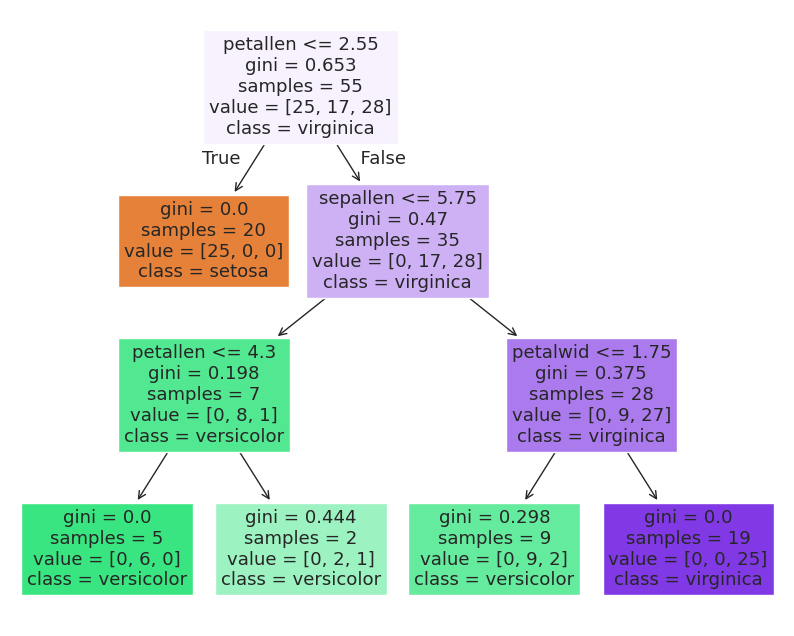

In [ ]:
#
# we can get the individual trees, if we want...  Let's try it on tree #28
#
tree_index = 28   # which tree
one_rf_tree = rforest_model_tuned.estimators_[tree_index]
print(f"One of the forest's trees is {one_rf_tree}")

# From there, it's possible to create a graphical version...
filename = f'rf_tree_{tree_index:03d}.gv'             # f strings! Could save all trees, but we won't do so here.
tree.export_graphviz(one_rf_tree, out_file=filename,  # the filename constructed above...!
                            feature_names=FEATURES, # actual feature names, not species
                            filled=True,              # fun!
                            rotate=False,             # False for Up/Down; True for L/R
                            class_names=SPECIES,      # good to have
                            leaves_parallel=True )    # lots of options!

print(f"file {filename} written. Try copying the result to http://viz-js.com/ \n")
with open(filename, "r") as f:
    file_text = f.read()
    print(file_text)

# One tree:
fig = plt.figure(figsize=(10,8))
tree_plot = tree.plot_tree(one_rf_tree,
                   feature_names=FEATURES,   # Glad to have these!
                   class_names=SPECIES,      # and these!!
                   filled=True)

In [ ]:
#
# final predictive model (random forests), with tuned parameters + ALL data incorporated
#

def predictive_model( Features, Model ):
    """ input: a list of four features
                [ sepallen, sepalwid, petallen, petalwid ]
        output: the predicted species of iris, from
                  setosa (0), versicolor (1), virginica (2)
    """
    our_features = np.asarray([Features])                 # extra brackets needed
    predicted_species = Model.predict(our_features)       # The model's prediction!
    predicted_species = int(round(predicted_species[0]))  # unpack the extra brackets
    return predicted_species

#
# Try it!
#
# Features = eval(input("Enter new Features: "))
#
Features = [6.7,3.3,5.7,0.1]  # [5.8,2.7,4.1,1.0] [4.6,3.6,3.0,2.2] [6.7,3.3,5.7,2.1]

LoF = [
[4.8, 3.1, 1.6, 0.2 ],   # actually setosa
[5.7, 2.9, 4.2, 1.3 ],   # actually versicolor
[5.8, 2.7, 5.1, 1.9 ],   # actually virginica
[5.2, 4.1, 1.5, 0.1 ],   # actually setosa
[5.4, 3.4, 1.5, 0.4 ],   # actually setosa
[5.1, 2.5, 3.0, 1.1 ],   # actually versicolor
[6.2, 2.9, 4.3, 1.3 ],   # actually versicolor
[6.3, 3.3, 6.0, 2.5 ],   # actually virginica
[5.7, 2.8, 4.1, 1.3 ],   # actually virginica  <-- almost always wrong!
]

# run on each one:
for Features in LoF:
    predicted_species = predictive_model( Features, rforest_model_tuned )  # pass in the model, too!
    name = SPECIES[predicted_species]
    print(f"from the features {Features} I predict {name}")    # Answers in the assignment...

from the features [4.8, 3.1, 1.6, 0.2] I predict setosa
from the features [5.7, 2.9, 4.2, 1.3] I predict versicolor
from the features [5.8, 2.7, 5.1, 1.9] I predict virginica
from the features [5.2, 4.1, 1.5, 0.1] I predict setosa
from the features [5.4, 3.4, 1.5, 0.4] I predict setosa
from the features [5.1, 2.5, 3.0, 1.1] I predict versicolor
from the features [6.2, 2.9, 4.3, 1.3] I predict versicolor
from the features [6.3, 3.3, 6.0, 2.5] I predict virginica
from the features [5.7, 2.8, 4.1, 1.3] I predict versicolor


#### We can visualize parameter space...

_for any model_ &nbsp; Let's "see inside" our Random Forest:

+ first by computing all of the predictions in two dimensions
+ then by showing them as a heatmap!

In [ ]:
# we can only plot 2 dimensions at a time!
# These two will be our constants:
sepallen = 5.0
sepalwid = 3.0
# petallen =
# petalwid =

VERTICAL = np.arange(0,8,.1) # array of vertical input values
HORIZONT = np.arange(0,8,.1) # array of horizontal input values
PLANE = np.zeros( (len(HORIZONT),len(VERTICAL)) ) # the output array
MODEL = rforest_model_tuned

col = 0
row = 0
for petallen in VERTICAL: # for every sepal length
  for petalwid in HORIZONT: # for every sepal width
    Features = [ sepallen, sepalwid, petallen, petalwid ]
    output = predictive_model(Features,MODEL)
    #print(f"Input {Features} Output: {output}")
    PLANE[row,col] = output
    row += 1
  row = 0
  col += 1
  print(".", end="")  # so we know it's running
  if col % 42 == 0: print() # same...

print("\n", PLANE[0:3,0:3]) # small bit of the upper-left corner

..........................................
................

KeyboardInterrupt: 

In [ ]:
import seaborn as sns
# sns.heatmap(PLANE)

#sns.set(rc = {'figure.figsize':(18,12)})  # figure size!

fig, ax = plt.subplots(figsize=(12,8))

# Create the heatmap
im = ax.imshow(PLANE, cmap="viridis", extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()], origin="lower", aspect="auto")

# Set axis labels and ticks
ax.set_xlabel("petalwid", fontsize=14)
ax.set_ylabel("petallen", fontsize=14)

ax.set_title(f"RF: petallen vs petalwid with sepallen == {sepallen:.1f} and sepalwid == {sepalwid:.1f}\n", fontsize=18)
# Calculate the indices for reduced ticks and labels
reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)
# Ensure that the last index is included
# if reduced_tick_indices[-1] != len(HORIZONT)-1:
#   reduced_tick_indices = np.append(reduced_tick_indices, len(HORIZONT)-1)


# Set ticks and tick labels with correct values
ax.set_xticks(HORIZONT[reduced_tick_indices]) # Display ticks every 0.4 unit
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{x:.1f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)  # Format x-axis labels
ax.set_yticklabels([f"{y:.1f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)  # Format y-axis labels

# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Species (0: Setosa, 1: Versicolor, 2: Virginica)', rotation=270, labelpad=25)

plt.show()

print("Remember our species-to-number mapping:")
print("0 - setosa")
print("1 - versicolor")
print("2 - virginica")

We've done it!

Remember that the model _thinks_ it knows everything...

The _feature importances_ are probably what it knows the best:

In [ ]:
rforest_model_tuned.feature_importances_

<br>
<hr>
<br>

# Your tasks!

Based on the examples above, your task is to build a DT+RF model (along with the tests and visualizations) for two datasets:

*   the births dataset and
*   the digits dataset

<br>
<hr>
<br>

Suggestion:  Perhaps open this notebook twice...

_Then you can copy-paste-adapt the iris workflow to each new dataset!_

<br>
<hr>
<br>

As optional EC, track down another dataset of your own choosing and build a DT+RF model  

Notice that this can be an excellent final project, too! 😃

In [ ]:
# Section 1: Libraries
import time
import sklearn
import numpy as np
import pandas as pd

# Section 2: Read the already-cleaned data
cleaned_filename = "digits_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3: Drop any columns we don't want to use
ROW = 0
COLUMN = 1
# For digits, we want all pixel columns and the actual_digit column
df_model1 = df_tidy.copy()  # We'll keep all columns for digits

# Section 4: Create COLUMNS and DIGITS variables
COLUMNS = df_model1.columns[:-1]  # All columns except the last one (actual_digit)
DIGITS = list(range(10))  # Digits 0-9
DIGITS_INDEX = {d:i for i,d in enumerate(DIGITS)}  # digit to index
COLUMNS_INDEX = {c:i for i,c in enumerate(COLUMNS)}  # column name to index
if False: print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {DIGITS = } \n {DIGITS_INDEX = }")

# Section 5: Convert from pandas to numpy
A = df_model1.to_numpy()
A = A.astype('float64')
NUM_ROWS, NUM_COLS = A.shape
if False: print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6: Define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,:-1]  # All columns except last (pixel values)
y_all = A[:,-1]   # Last column (actual digit)
if False:
    print(f"The labels/digits are \n {y_all} \n ")
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7: 80/20 split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)  # random_state=42
if False:
    print(f"training with {len(y_train)} rows; testing with {len(y_test)} rows\n")
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")  # 5 rows

# Section 8: Model-building with initial guess
from sklearn import tree
best_depth = 5  # Initial guess for digits (more complex than iris)
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model.fit(X_train, y_train)
if False: print("Created and trained a classifier with best_depth =", best_depth)

# Section 9: Evaluate on TEST data
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual labels:", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set: {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10: Cross-validate to find best depth
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_depth = 1
best_accuracy = 0.0
for depth in range(1,21):  # Trying deeper trees for digits
    dtree_cv_model = tree.DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(dtree_cv_model, X_train, y_train, cv=5)
    this_cv_accuracy = cv_scores.mean()
    if False: print(f"depth: {depth:2d} cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:
        best_accuracy = this_cv_accuracy
        best_depth = depth
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)
if True: print(f"best_depth = {best_depth} \n yields the highest cv accuracy: {best_accuracy}\n")

# Section 11: Final model with best-found parameters
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model_final.fit(X_all, y_all)
if True: print("Created and trained a classifier with best_depth =", best_depth)

# Print feature importances (for pixels)
if False:
    importances = dtree_model_final.feature_importances_
    print("\nTop 10 most important pixels:")
    top_pixels = np.argsort(importances)[-10:][::-1]  # Get indices of top 10 important pixels
    for i, pixel_idx in enumerate(top_pixels):
        print(f"Pixel {pixel_idx} (pix{pixel_idx}): {importances[pixel_idx]:.4f}")

# Evaluate final model on test set
predicted_labels_final = dtree_model_final.predict(X_test)
num_correct_final = sum(predicted_labels_final == actual_labels)
total_final = len(actual_labels)
print(f"\nFinal model results on test set: {num_correct_final} correct out of {total_final} total, for {num_correct_final*100/total_final:.1f}%")

Cross-validating...
best_depth = 14 
 yields the highest cv accuracy: 0.8613863619276746

Created and trained a classifier with best_depth = 14

Final model results on test set: 354 correct out of 354 total, for 100.0%


In [ ]:
def compare_labels(predicted_labels, actual_labels):
    """ a more neatly formatted comparison for digits """
    NUM_LABELS = len(predicted_labels)
    num_correct = 0

    print()
    print(f'row {"#":>3s} : {"predicted":>12s} {"actual":<12s}   {"result"}')

    for i in range(NUM_LABELS):
        p = int(round(predicted_labels[i]))         # round protects from fp error
        a = int(round(actual_labels[i]))
        result = "incorrect"
        if p == a:  # if they match,
            result = ""       # no longer incorrect
            num_correct += 1  # and we count a match!

        print(f"row {i:>3d} : {p:>12d} {a:<12d}   {result}")

    print()
    print("Correct:", num_correct, "out of", NUM_LABELS)
    return num_correct

# let's try it out! use the model you want:
predicted_labels = dtree_model_final.predict(X_test)      # THIS IS THE KEY LINE: predict
compare_labels(predicted_labels, actual_labels)


row   # :    predicted actual         result
row   0 :            6 6              
row   1 :            7 7              
row   2 :            7 7              
row   3 :            3 3              
row   4 :            7 7              
row   5 :            1 1              
row   6 :            1 1              
row   7 :            1 1              
row   8 :            6 6              
row   9 :            7 7              
row  10 :            8 8              
row  11 :            0 0              
row  12 :            6 6              
row  13 :            2 2              
row  14 :            8 8              
row  15 :            5 5              
row  16 :            7 7              
row  17 :            7 7              
row  18 :            5 5              
row  19 :            6 6              
row  20 :            8 8              
row  21 :            5 5              
row  22 :            7 7              
row  23 :            9 9              
row  24 :         

354

File digits_tree.gv written. Try pasting its contents to http://viz-js.com/

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="pix36 <= 0.5\nsamples = 100.0%\nvalue = [0.098, 0.101, 0.099, 0.102, 0.101, 0.101, 0.101, 0.1\n0.097, 0.1]\nclass = 3", fillcolor="#ffffff"] ;
1 [label="pix33 <= 0.5\nsamples = 15.0%\nvalue = [0.635, 0.0, 0.015, 0.004, 0.019, 0.094, 0.019, 0.0\n0.008, 0.207]\nclass = 0", fillcolor="#f1bb94"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="pix21 <= 6.0\nsamples = 4.3%\nvalue = [0.0, 0.0, 0.053, 0.013, 0.013, 0.145, 0.039, 0.0\n0.013, 0.724]\nclass = 9", fillcolor="#ed798e"] ;
1 -> 2 ;
3 [label="pix18 <= 10.0\nsamples = 1.1%\nvalue = [0.0, 0.0, 0.158, 0.0, 0.053, 0.579, 0.158, 0.0, 0.0\n0.053]\nclass = 5", fillcolor="#9ccef2"] ;
2 -> 3 ;
4 [label="pix45 <= 1.0\nsamples = 0.5%\nvalue = [0.0, 0.0, 0.375, 0.0, 0.125, 0.0,

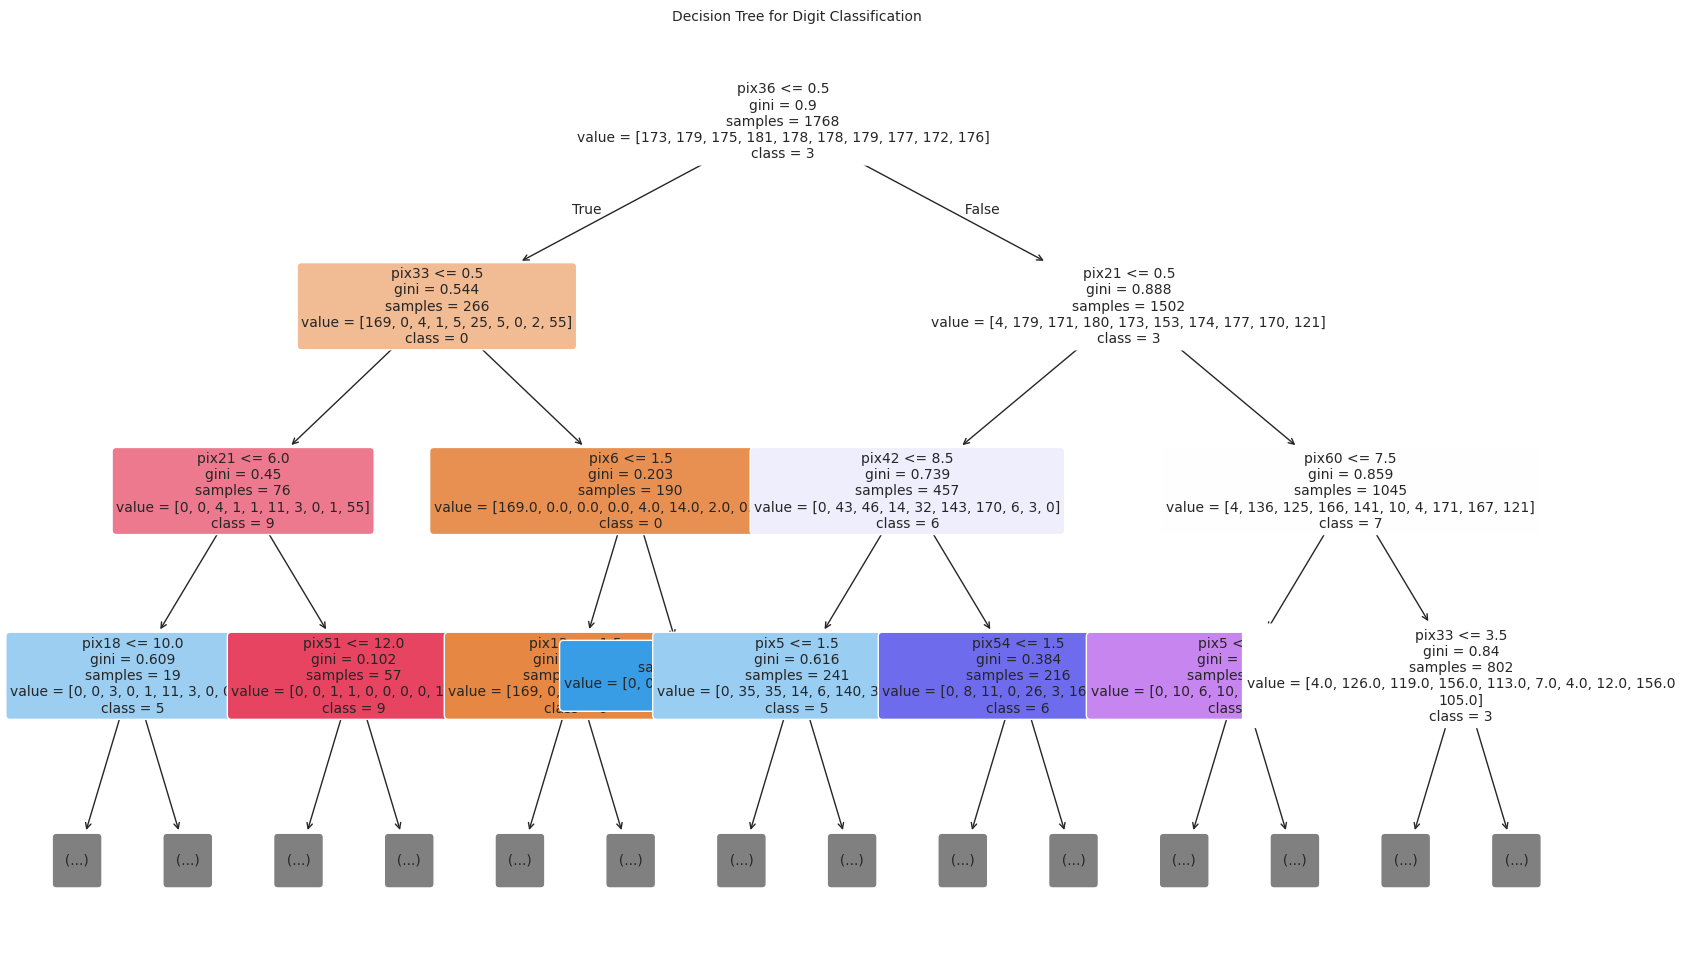

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

# For digits, our features are all pixel columns (pix0 to pix63)
FEATURES = COLUMNS  # All pixel columns are features

# Visualize the tree
filename = 'digits_tree.gv'    # Output filename for graphviz
model = dtree_model_final

# Export the tree to graphviz format
tree.export_graphviz(model, out_file=filename,
                    feature_names=COLUMNS,  # All pixel feature names
                    filled=True,            # Color the nodes
                    rotate=False,           # Up/Down orientation
                    class_names=[str(d) for d in DIGITS],  # Digit classes 0-9
                    leaves_parallel=True,
                    impurity=False,         # Simpler visualization
                    proportion=True)        # Show class proportions

print(f"File {filename} written. Try pasting its contents to http://viz-js.com/\n")

# Print the graphviz file contents
with open(filename, "r") as f:
    all_file_text = f.read()
    print(all_file_text)

# Create a matplotlib visualization of the tree
plt.figure(figsize=(20, 12))
tree_plot = tree.plot_tree(model,
                   feature_names=FEATURES,   # Pixel feature names
                   class_names=[str(d) for d in DIGITS],  # Digit classes
                   filled=True,
                   rounded=True,
                   fontsize=10,
                   max_depth=3)  # Limit depth for readability

plt.title("Decision Tree for Digit Classification", fontsize=10)
plt.show()

In [ ]:
# Section 1: Libraries
import time
import sklearn
import numpy as np
import pandas as pd

# Section 2: Read the already-cleaned data
cleaned_filename = "digits_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3: Drop any columns we don't want to use
ROW = 0
COLUMN = 1
# For digits, we'll keep all columns (64 pixels + actual_digit)
df_model1 = df_tidy.copy()

# Section 4: Create COLUMNS and DIGITS variables
COLUMNS = df_model1.columns[:-1]  # All pixel columns
DIGITS = list(range(10))  # Digits 0-9
DIGITS_INDEX = {d:i for i,d in enumerate(DIGITS)}  # digit to index
COLUMNS_INDEX = {c:i for i,c in enumerate(COLUMNS)}  # column name to index
if False: print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {DIGITS = } \n {DIGITS_INDEX = }")

# Section 5: Convert from pandas to numpy
A = df_model1.to_numpy()
A = A.astype('float64')
NUM_ROWS, NUM_COLS = A.shape
if False: print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6: Define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,:-1]  # All pixel values
y_all = A[:,-1]   # Actual digit labels
if False:
    print(f"The labels/digits are \n {y_all} \n ")
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7: 80/20 split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20, random_state=42)
if False:
    print(f"training with {len(y_train)} rows; testing with {len(y_test)} rows\n")
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")

# Section 8: Initial Random Forest model
from sklearn import ensemble
best_d = 10  # Increased initial depth for digits
best_num_trees = 100  # Increased initial number of trees
rforest_model = ensemble.RandomForestClassifier(
    max_depth=best_d,
    n_estimators=best_num_trees,
    max_samples=0.5,
    random_state=42
)
rforest_model.fit(X_train, y_train)
if False: print(f"Built a Random Forest with depth={best_d} and number of trees={best_num_trees}")

# Section 9: Evaluate on TEST data
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual labels:", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set: {num_correct} correct out of {total} total, for {num_correct*100/total:.1f}%\n")

# Section 10: Cross-validation to find best parameters
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_d = 5
best_num_trees = 100
best_accuracy = 0

# Wider ranges for digits classification
for d in range(5, 21, 5):  # Test depths from 5 to 20 in steps of 5
    for ntrees in [50, 100, 200, 300]:  # Test different numbers of trees
        rforest_cv_model = ensemble.RandomForestClassifier(
            max_depth=d,
            n_estimators=ntrees,
            max_samples=0.5,
            random_state=42
        )
        cv_scores = cross_val_score(rforest_cv_model, X_train, y_train, cv=5)
        average_cv_accuracy = cv_scores.mean()
        if True: print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_num_trees = ntrees

if True: print(f"\nbest_depth: {best_d} and best_num_trees: {best_num_trees} are our choices. Accuracy: {best_accuracy:.4f}")

# Section 11: Final model with best parameters
rforest_model_tuned = ensemble.RandomForestClassifier(
    max_depth=best_d,
    n_estimators=best_num_trees,
    max_samples=0.5,
    random_state=42
)
rforest_model_tuned.fit(X_all, y_all)
if True: print(f"\nCreated and trained final Random Forest with depth={best_d} and {best_num_trees} trees")

# Print feature importances
if True:
    importances = rforest_model_tuned.feature_importances_
    print("\nTop 10 most important pixels:")
    top_pixels = np.argsort(importances)[-10:][::-1]  # Get indices of top 10 important pixels
    for i, pixel_idx in enumerate(top_pixels):
        print(f"Pixel {pixel_idx} (pix{pixel_idx}): {importances[pixel_idx]:.4f}")

# Evaluate final model on test set
predicted_labels_final = rforest_model_tuned.predict(X_test)
num_correct_final = sum(predicted_labels_final == actual_labels)
total_final = len(actual_labels)
print(f"\nFinal model test accuracy: {num_correct_final}/{total_final} ({num_correct_final*100/total_final:.1f}%)")

Cross-validating...
depth:  5 ntrees:  50 cv accuracy:  0.9364
depth:  5 ntrees: 100 cv accuracy:  0.9392
depth:  5 ntrees: 200 cv accuracy:  0.9406
depth:  5 ntrees: 300 cv accuracy:  0.9399
depth: 10 ntrees:  50 cv accuracy:  0.9639
depth: 10 ntrees: 100 cv accuracy:  0.9632
depth: 10 ntrees: 200 cv accuracy:  0.9654
depth: 10 ntrees: 300 cv accuracy:  0.9668
depth: 15 ntrees:  50 cv accuracy:  0.9632
depth: 15 ntrees: 100 cv accuracy:  0.9646
depth: 15 ntrees: 200 cv accuracy:  0.9653
depth: 15 ntrees: 300 cv accuracy:  0.9675
depth: 20 ntrees:  50 cv accuracy:  0.9632
depth: 20 ntrees: 100 cv accuracy:  0.9646
depth: 20 ntrees: 200 cv accuracy:  0.9661
depth: 20 ntrees: 300 cv accuracy:  0.9675

best_depth: 15 and best_num_trees: 300 are our choices. Accuracy: 0.9675

Created and trained final Random Forest with depth=15 and 300 trees

Top 10 most important pixels:
Pixel 21 (pix21): 0.0520
Pixel 43 (pix43): 0.0438
Pixel 26 (pix26): 0.0407
Pixel 36 (pix36): 0.0388
Pixel 42 (pix42): 

Extracted tree #28 from the Random Forest

File digits_rf_tree_028.gv written. You can visualize it at http://viz-js.com/
Here are the first few lines of the Graphviz file:

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label=<pix33 &le; 1.5<br/>samples = 100.0%<br/>value = [0.104, 0.127, 0.086, 0.098, 0.104, 0.098, 0.104, 0.094<br/>0.08, 0.104]<br/>class = 1>, fillcolor="#fefefa"] ;
1 [label=<pix38 &le; 0.5<br/>samples = 61.8%<br/>value = [0.002, 0.148, 0.137, 0.159, 0.011, 0.099, 0.051, 0.106<br/>0.126, 0.161]<br/>class = 9>, fillcolor="#ffffff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<pix27 &le; 10.5<br/>samples = 38.1%<br/>value = [0.0, 0.215, 0.215, 0.131, 0.009, 0.113, 0.032, 0.029<br/>0.198, 0.058]<br/>class = 1>, fillcolor="#ffffff"] ;
1 -> 2 ;
3 [label=<pix21 &le; 9.5<br/>samples = 13.3%<br/>value = [0.0, 0.046, 0.469,

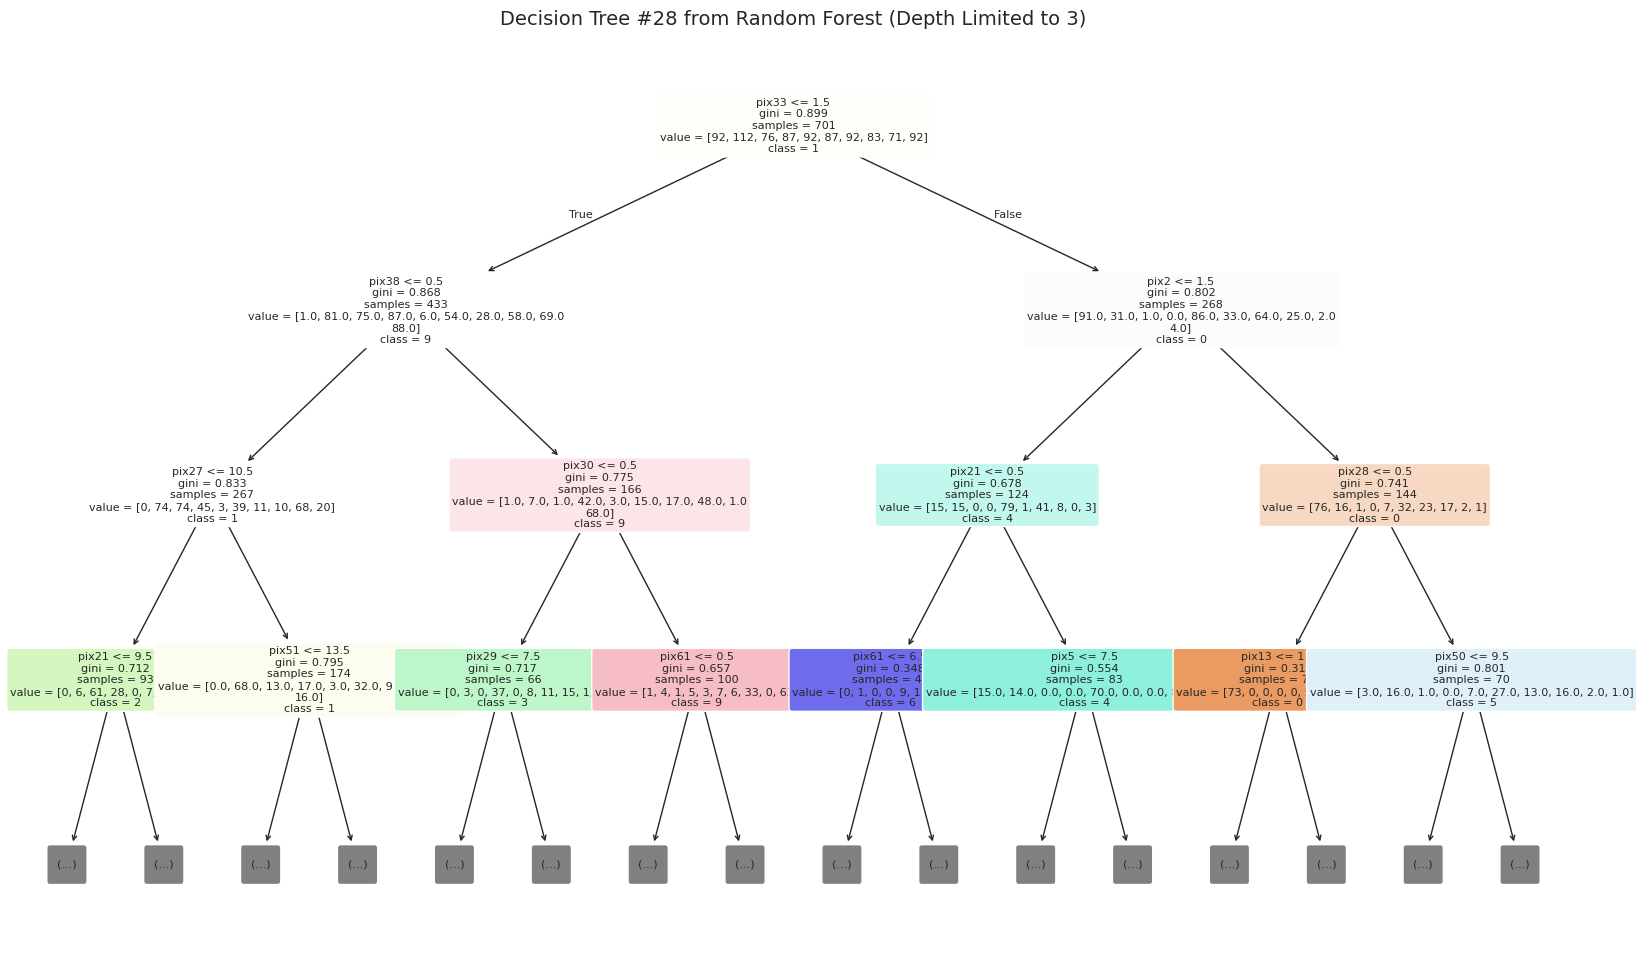


Text representation of tree #28 (depth limited to 3):

|--- pix33 <= 1.50
|   |--- pix38 <= 0.50
|   |   |--- pix27 <= 10.50
|   |   |   |--- pix21 <= 9.50
|   |   |   |   |--- truncated branch of depth 6
|   |   |   |--- pix21 >  9.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- pix27 >  10.50
|   |   |   |--- pix51 <= 13.50
|   |   |   |   |--- truncated branch of depth 8
|   |   |   |--- pix51 >  13.50
|   |   |   |   |--- truncated branch of depth 7
|   |--- pix38 >  0.50
|   |   |--- pix30 <= 0.50
|   |   |   |--- pix29 <= 7.50
|   |   |   |   |--- truncated branch of depth 5
|   |   |   |--- pix29 >  7.50
|   |   |   |   |--- truncated branch of depth 5
|   |   |--- pix30 >  0.50
|   |   |   |--- pix61 <= 0.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- pix61 >  0.50
|   |   |   |   |--- truncated branch of depth 6
|--- pix33 >  1.50
|   |--- pix2 <= 1.50
|   |   |--- pix21 <= 0.50
|   |   |   |--- pix61 <= 6.50
|   |   |   |   |--- truncat

In [ ]:
#
# We can get the individual trees - let's examine one
#
tree_index = 28   # which tree to visualize (can be any index up to n_estimators-1)
one_rf_tree = rforest_model_tuned.estimators_[tree_index]
print(f"Extracted tree #{tree_index} from the Random Forest")

# Export the tree to Graphviz format
filename = f'digits_rf_tree_{tree_index:03d}.gv'
tree.export_graphviz(one_rf_tree,
                    out_file=filename,
                    feature_names=COLUMNS,  # All pixel feature names
                    filled=True,
                    rounded=True,
                    rotate=False,
                    class_names=[str(d) for d in DIGITS],  # Digit classes 0-9
                    leaves_parallel=True,
                    impurity=False,
                    proportion=True,
                    special_characters=True)

print(f"\nFile {filename} written. You can visualize it at http://viz-js.com/")
print("Here are the first few lines of the Graphviz file:\n")

# Show first part of the file (full trees can be very large)
with open(filename, "r") as f:
    for i, line in enumerate(f):
        if i < 10:  # Show first 10 lines
            print(line.strip())
        if i == 10:
            print("... [truncated] ...")
            break

# Visualize the tree with matplotlib (limited depth for readability)
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
tree.plot_tree(one_rf_tree,
              feature_names=COLUMNS,
              class_names=[str(d) for d in DIGITS],
              filled=True,
              rounded=True,
              fontsize=8,
              max_depth=3)  # Limit depth for visualization

plt.title(f"Decision Tree #{tree_index} from Random Forest (Depth Limited to 3)", fontsize=14)
plt.show()

# Alternative: Show the tree rules as text (more compact)
tree_rules = tree.export_text(one_rf_tree,
                            feature_names=list(COLUMNS),
                            max_depth=3)  # Limit depth for readability
print(f"\nText representation of tree #{tree_index} (depth limited to 3):\n")
print(tree_rules)

# Show feature importance for this specific tree
print(f"\nFeature importances for tree #{tree_index}:")
tree_importances = one_rf_tree.feature_importances_
top_pixels = np.argsort(tree_importances)[-10:][::-1]  # Top 10 important pixels
for i, pixel_idx in enumerate(top_pixels):
    print(f"Pixel {pixel_idx:2d} (pix{pixel_idx}): {tree_importances[pixel_idx]:.4f}")

Digit Predictions:
Test digit 1: Predicted 0
Test digit 2: Predicted 3
Test digit 3: Predicted 7
Test digit 4: Predicted 4
Test digit 5: Predicted 9

Visualizing first test digit:


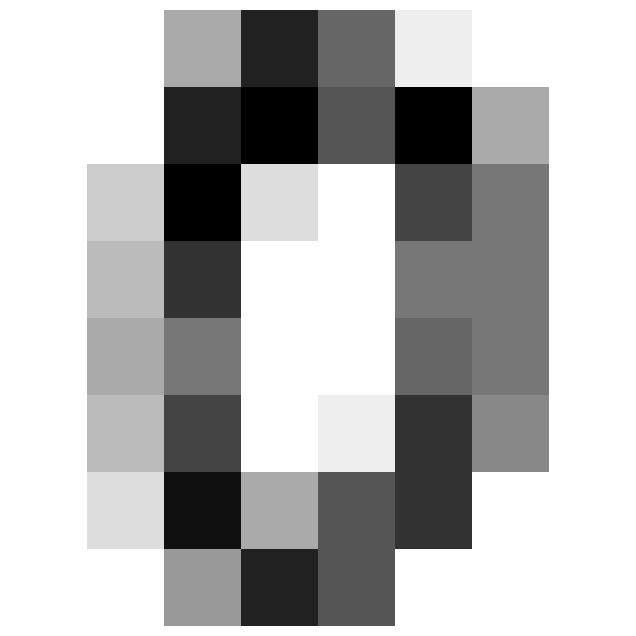

In [ ]:
#
# Final predictive model (Random Forest), with tuned parameters + ALL data incorporated
#

def predictive_digit_model(pixel_values, Model):
    """
    Input: A list of 64 pixel values [pix0, pix1, ..., pix63]
    Output: The predicted digit (0-9)
    """
    # Convert input to numpy array and reshape for prediction
    pixel_array = np.asarray([pixel_values])  # Extra brackets needed for single sample
    predicted_digit = Model.predict(pixel_array)
    predicted_digit = int(round(predicted_digit[0]))  # Unpack the prediction
    return predicted_digit

#
# Test the model with sample digit data
#

# Example digit data (flattened 8x8 images as lists of 64 pixel values)
# Each list represents a digit's pixel values (0-16) in row-major order
test_digits = [
    # Digit 0
    [0, 0, 5, 13, 9, 1, 0, 0, 0, 0, 13, 15, 10, 15, 5, 0,
     0, 3, 15, 2, 0, 11, 8, 0, 0, 4, 12, 0, 0, 8, 8, 0,
     0, 5, 8, 0, 0, 9, 8, 0, 0, 4, 11, 0, 1, 12, 7, 0,
     0, 2, 14, 5, 10, 12, 0, 0, 0, 0, 6, 13, 10, 0, 0, 0],

    # Digit 1
    [0, 0, 0, 12, 10, 0, 0, 0, 0, 0, 1, 16, 14, 0, 0, 0,
     0, 0, 0, 11, 16, 2, 0, 0, 0, 0, 0, 0, 14, 12, 0, 0,
     0, 0, 0, 0, 2, 16, 4, 0, 0, 0, 0, 0, 0, 12, 8, 0,
     0, 0, 0, 0, 0, 10, 8, 0, 0, 0, 0, 8, 12, 16, 6, 0],

    # Digit 7
    [0, 0, 10, 16, 16, 16, 8, 0, 0, 0, 8, 8, 8, 16, 4, 0,
     0, 0, 0, 0, 8, 14, 0, 0, 0, 0, 0, 3, 13, 3, 0, 0,
     0, 0, 0, 10, 9, 0, 0, 0, 0, 0, 4, 15, 1, 0, 0, 0,
     0, 0, 12, 7, 0, 0, 0, 0, 0, 0, 16, 3, 0, 0, 0, 0],

    # Digit 4
    [0, 0, 0, 1, 11, 16, 4, 0, 0, 0, 0, 9, 16, 16, 4, 0,
     0, 0, 8, 16, 9, 16, 4, 0, 0, 5, 16, 4, 6, 16, 4, 0,
     0, 11, 16, 16, 16, 16, 12, 0, 0, 3, 8, 8, 8, 16, 4, 0,
     0, 0, 0, 0, 0, 16, 4, 0, 0, 0, 0, 0, 0, 15, 4, 0],

    # Digit 9
    [0, 0, 6, 14, 4, 0, 0, 0, 0, 0, 11, 16, 10, 0, 0, 0,
     0, 0, 8, 14, 16, 2, 0, 0, 0, 0, 1, 12, 12, 11, 0, 0,
     0, 0, 0, 0, 0, 11, 3, 0, 0, 0, 0, 0, 0, 5, 11, 0,
     0, 0, 1, 5, 4, 7, 16, 2, 0, 0, 7, 16, 16, 13, 11, 1]
]

# Run predictions on each test digit
print("Digit Predictions:")
for i, pixel_values in enumerate(test_digits):
    predicted_digit = predictive_digit_model(pixel_values, rforest_model_tuned)
    print(f"Test digit {i+1}: Predicted {predicted_digit}")

# Optional: Visualize one of the test digits
def visualize_digit(pixels):
    """ Visualize a digit from its pixel values """
    import matplotlib.pyplot as plt
    image = np.array(pixels).reshape(8, 8)
    plt.imshow(image, cmap='gray_r', interpolation='nearest')
    plt.axis('off')
    plt.show()

# Visualize the first test digit
print("\nVisualizing first test digit:")
visualize_digit(test_digits[0])

In [ ]:


# These two will be our varying pixels:
pix28 = 0  # will vary from 0 to 16
pix35 = 0  # will vary from 0 to 16

VERTICAL = np.arange(0, 16, 0.5)  # array of vertical input values (pix28)
HORIZONT = np.arange(0, 16, 0.5)  # array of horizontal input values (pix35)
PLANE = np.zeros((len(HORIZONT), len(VERTICAL)))  # the output array
MODEL = rforest_model

col = 0
row = 0
for pix28_val in VERTICAL:  # for every pix28 value
    for pix35_val in HORIZONT:  # for every pix35 value
        # Create feature vector with all constant values except our two varying pixels
        Features = constant_features.copy()
        Features[28] = pix28_val
        Features[35] = pix35_val

        # Predict the digit
        output = MODEL.predict([Features])[0]
        PLANE[row, col] = output
        row += 1
    row = 0
    col += 1
    print(".", end="")  # progress indicator
    if col % 20 == 0:
        print()  # new line every 20 columns

print("\nSample of the output plane:")
print(PLANE[0:3, 0:3])  # small sample of the upper-left corner

....................
............
Sample of the output plane:
[[8. 8. 8.]
 [8. 8. 8.]
 [8. 8. 8.]]


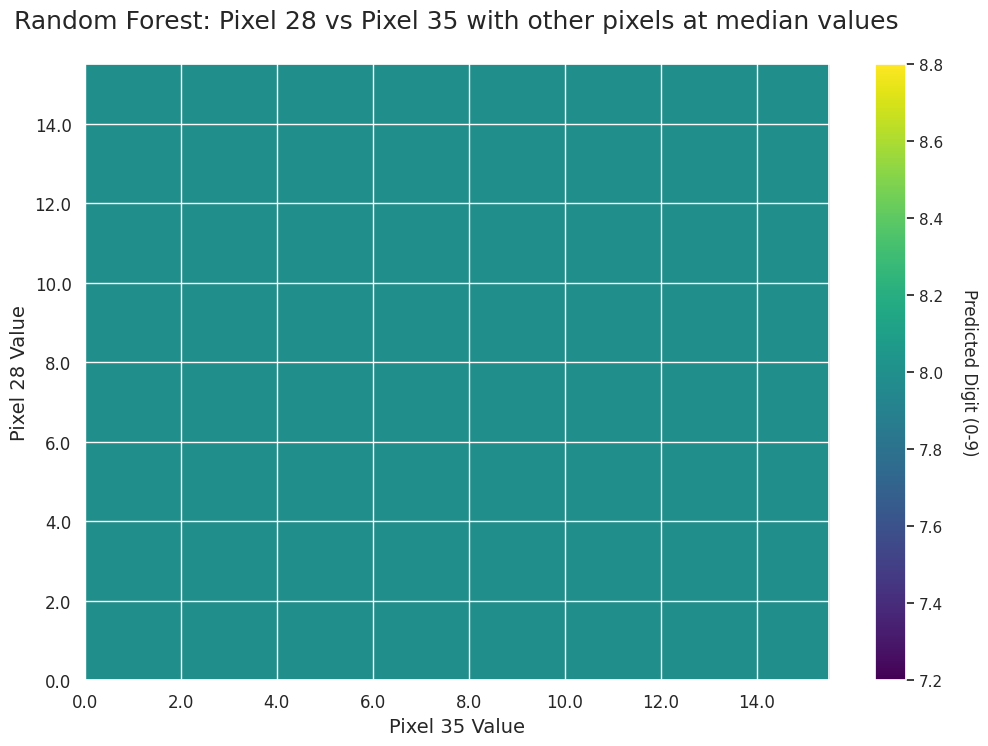

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure
sns.set(rc={'figure.figsize':(18,12)})
fig, ax = plt.subplots(figsize=(12,8))

# Create the heatmap
im = ax.imshow(PLANE, cmap="viridis",
               extent=[HORIZONT.min(), HORIZONT.max(), VERTICAL.min(), VERTICAL.max()],
               origin="lower", aspect="auto")

# Set axis labels and ticks
ax.set_xlabel("Pixel 35 Value", fontsize=14)
ax.set_ylabel("Pixel 28 Value", fontsize=14)

ax.set_title(f"Random Forest: Pixel 28 vs Pixel 35 with other pixels at median values\n", fontsize=18)

# Calculate the indices for reduced ticks and labels
reduced_tick_indices = np.arange(0, len(HORIZONT), len(HORIZONT)//8)

# Set ticks and tick labels with correct values
ax.set_xticks(HORIZONT[reduced_tick_indices])
ax.set_yticks(VERTICAL[reduced_tick_indices])
ax.set_xticklabels([f"{x:.1f}" for x in HORIZONT[reduced_tick_indices]], fontsize=12)
ax.set_yticklabels([f"{y:.1f}" for y in VERTICAL[reduced_tick_indices]], fontsize=12)

# Add a colorbar
cbar = plt.colorbar(im)
cbar.set_label('Predicted Digit (0-9)', rotation=270, labelpad=25)

plt.show()


In [ ]:
# Section 1: Libraries
import time
import sklearn
import numpy as np
import pandas as pd

# Section 2: Read the already-cleaned data
cleaned_filename = "births_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3: Drop any columns we don't want to use
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop(['month', 'day', 'above/below median'], axis=COLUMN)
if False: print("df_model1 is\n", df_model1)

# Section 4: Create COLUMNS and TARGET variables
COLUMNS = df_model1.columns
TARGET = ['popularity']  # Our target is popularity (0 or 1)
COLUMNS_INDEX = {c:i for i,c in enumerate(COLUMNS)}  # str to int mapping
if False: print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {TARGET = }")

# Section 5: Convert from pandas to numpy
A = df_model1.to_numpy()
A = A.astype('float64')
NUM_ROWS, NUM_COLS = A.shape
if False: print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6: Define our features (X_all) and our target-to-predict (y_all)
X_all = A[:,0:1]  # Only using 'births' as feature
y_all = A[:,1]    # Predicting 'popularity'
if False:
    print(f"The target values are \n {y_all} \n")
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7: 80/20 split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)
if False:
    print(f"training with {len(y_train)} rows; testing with {len(y_test)} rows\n")
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")

# Section 8: Model-building with initial parameters
from sklearn import tree
best_depth = 1
dtree_model = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model.fit(X_train, y_train)
if False: print("Created and trained a classifier with best_depth =", best_depth)

# Section 9: Evaluate on TEST data
predicted_labels = dtree_model.predict(X_test)
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual labels:", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set: {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10: Cross-validate to find best depth
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_depth = 1
best_accuracy = 0.0
for depth in range(1,6):
    dtree_cv_model = tree.DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(dtree_cv_model, X_train, y_train, cv=5)
    this_cv_accuracy = cv_scores.mean()
    if False: print(f"depth: {depth:2d} cv accuracy: {this_cv_accuracy:7.4f}")
    if this_cv_accuracy > best_accuracy:
        best_accuracy = this_cv_accuracy
        best_depth = depth
    all_accuracies.append(this_cv_accuracy)
    time.sleep(0.002)
if True: print(f"best_depth = {best_depth} \n yields the highest cv accuracy: {best_accuracy}\n")

# Section 11: Final model with best parameters
dtree_model_final = tree.DecisionTreeClassifier(max_depth=best_depth)
dtree_model_final.fit(X_all, y_all)
if True: print("Created and trained a classifier with best_depth =", best_depth)
if False: print("\nThe feature importances are", dtree_model_final.feature_importances_)

Cross-validating...
best_depth = 1 
 yields the highest cv accuracy: 0.9897136177673875

Created and trained a classifier with best_depth = 1


In [ ]:
# Constants - since we only have one feature, we'll just plot that
births_range = np.arange(150000, 215000, 1000)  # Range of birth counts from min to max in the data
popularity_predictions = np.zeros(len(births_range))  # Array to store predictions

MODEL = dtree_model_final  # Our trained decision tree model

# Function to make predictions (simplified for single feature)
def predictive_model(feature_value, model):
    # Reshape the input to match what the model expects (2D array)
    input_data = np.array([[feature_value]])
    return model.predict(input_data)[0]

# Generate predictions across the range of birth counts
for i, births in enumerate(births_range):
    popularity_predictions[i] = predictive_model(births, MODEL)
    if i % 10 == 0:  # Print progress dots
        print(".", end="")

print("\nSample predictions:")
print("Births\tPredicted Popularity")
for i in range(0, len(births_range), 10):  # Print every 10th sample
    print(f"{births_range[i]}\t{popularity_predictions[i]}")

.......
Sample predictions:
Births	Predicted Popularity
150000	0.0
160000	0.0
170000	0.0
180000	0.0
190000	0.0
200000	1.0
210000	1.0


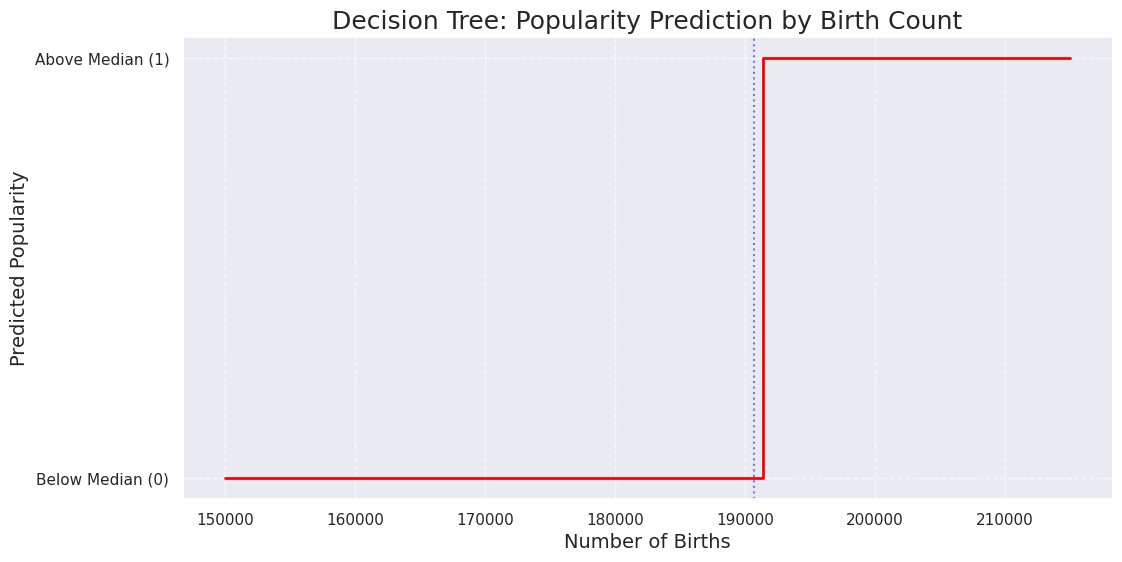

Popularity classification:
0 - Below median births
1 - Above median births


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a range of birth counts to visualize
births_range = np.linspace(150000, 215000, 100)  # 100 points from min to max birth counts

# Create predictions for each birth count
predictions = dtree_model_final.predict(births_range.reshape(-1, 1))

# Since we can't make a meaningful heatmap with 1D data, we'll create a step plot instead
plt.figure(figsize=(12, 6))
plt.step(births_range, predictions, where='post', color='red', linewidth=2)

# Formatting the plot
plt.title("Decision Tree: Popularity Prediction by Birth Count", fontsize=18)
plt.xlabel("Number of Births", fontsize=14)
plt.ylabel("Predicted Popularity", fontsize=14)
plt.yticks([0, 1], ['Below Median (0)', 'Above Median (1)'])
plt.grid(True, linestyle='--', alpha=0.7)

# Add vertical lines at decision boundaries
# Find where predictions change from 0 to 1
change_points = np.where(np.diff(predictions) != 0)[0]
for point in change_points:
    plt.axvline(x=births_range[point], color='blue', linestyle=':', alpha=0.5)

plt.show()

print("Popularity classification:")
print("0 - Below median births")
print("1 - Above median births")

Cross-validating...
depth:  1 ntrees:  50 cv accuracy:  0.9898
depth:  1 ntrees: 150 cv accuracy:  0.9831
depth:  1 ntrees: 250 cv accuracy:  0.9831
depth:  2 ntrees:  50 cv accuracy:  0.9831
depth:  2 ntrees: 150 cv accuracy:  0.9831
depth:  2 ntrees: 250 cv accuracy:  0.9831
depth:  3 ntrees:  50 cv accuracy:  0.9831
depth:  3 ntrees: 150 cv accuracy:  0.9831
depth:  3 ntrees: 250 cv accuracy:  0.9831
depth:  4 ntrees:  50 cv accuracy:  0.9831
depth:  4 ntrees: 150 cv accuracy:  0.9831
depth:  4 ntrees: 250 cv accuracy:  0.9831
depth:  5 ntrees:  50 cv accuracy:  0.9831
depth:  5 ntrees: 150 cv accuracy:  0.9831
depth:  5 ntrees: 250 cv accuracy:  0.9831
best_depth: 1 and best_num_trees: 50 are our choices. Acc: 0.9898305084745763
Created and trained final classifier with depth=1 and 50 trees

Feature importance: [1.]


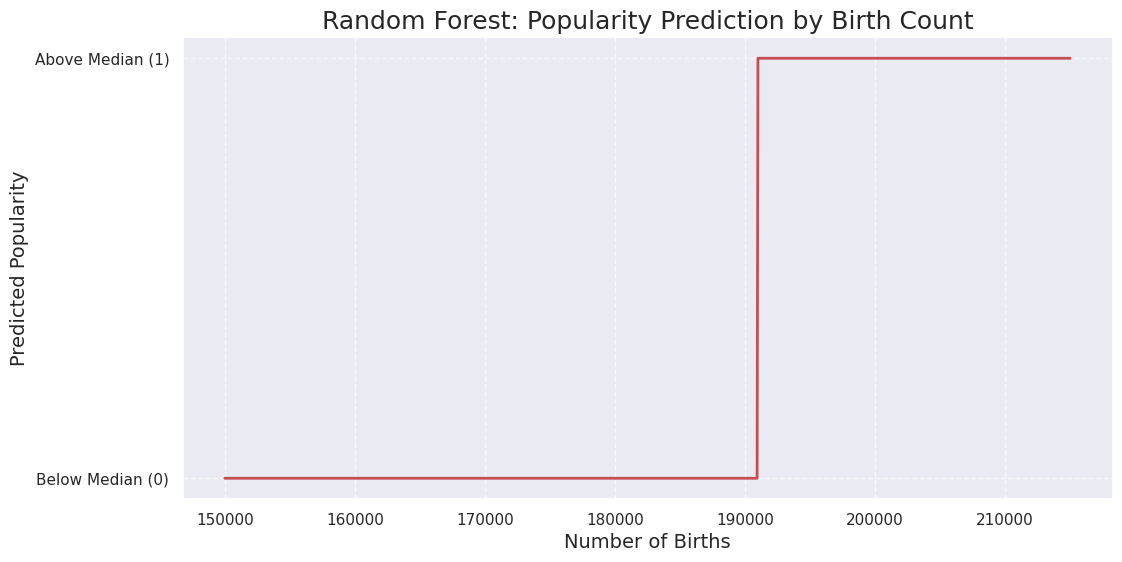

In [ ]:
# Section 1: Libraries
import time
import sklearn
import numpy as np
import pandas as pd

# Section 2: Read the cleaned births data
cleaned_filename = "births_cleaned.csv"
df_tidy = pd.read_csv(cleaned_filename)
if False:
    print(f"{cleaned_filename} : file read into a pandas dataframe.")
    print("df_tidy is\n", df_tidy)
    print("df_tidy.info() is"); df_tidy.info()

# Section 3: Drop columns we don't need
ROW = 0
COLUMN = 1
df_model1 = df_tidy.drop(['month', 'day', 'above/below median'], axis=COLUMN)
if False: print("df_model1 is\n", df_model1)

# Section 4: Create COLUMNS and TARGET variables
COLUMNS = df_model1.columns
TARGET = ['popularity']  # Our target is popularity (0 or 1)
COLUMNS_INDEX = {c:i for i,c in enumerate(COLUMNS)}  # str to int mapping
if False: print(f"{COLUMNS = } \n {COLUMNS_INDEX = } \n {TARGET = }")

# Section 5: Convert from pandas to numpy
A = df_model1.to_numpy()
A = A.astype('float64')
NUM_ROWS, NUM_COLS = A.shape
if False: print(f"\nThe dataset has {NUM_ROWS} rows and {NUM_COLS} cols")

# Section 6: Define features (X_all) and target (y_all)
X_all = A[:,0:1]  # Only using 'births' as feature
y_all = A[:,1]    # Predicting 'popularity'
if False:
    print(f"The target values are \n {y_all} \n")
    print(f"The first few data rows are \n {X_all[0:5,:]}")

# Section 7: 80/20 split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.20)
if False:
    print(f"training with {len(y_train)} rows; testing with {len(y_test)} rows\n")
    print(f"Held-out testing data... (testing data: {len(y_test)} rows)")
    print(f"y_test: {y_test}")
    print(f"X_test (first few rows): {X_test[0:5,:]}\n")
    print(f"Training Data used for modeling... (training data: {len(y_train)} rows)")
    print(f"y_train: {y_train}")
    print(f"X_train (first few rows): {X_train[0:5,:]}")

# Section 8: Initial Random Forest model
from sklearn import ensemble
best_d = 1            # Initial guess for max depth
best_num_trees = 42   # Initial guess for number of trees
rforest_model = ensemble.RandomForestClassifier(max_depth=best_d,
                                              n_estimators=best_num_trees,
                                              max_samples=0.5)
rforest_model.fit(X_train, y_train)
if False: print(f"Built a Random Forest with depth={best_d} and number of trees={best_num_trees}")

# Section 9: Evaluate initial model on TEST data
predicted_labels = rforest_model.predict(X_test)
actual_labels = y_test
if False:
    print("Predicted labels:", predicted_labels)
    print("Actual labels:", actual_labels)
    num_correct = sum(predicted_labels == actual_labels)
    total = len(actual_labels)
    print(f"\nResults on test set: {num_correct} correct out of {total} total, for {num_correct*100/total}%\n")

# Section 10: Cross-validation to find best parameters
print("Cross-validating...")
from sklearn.model_selection import cross_val_score
all_accuracies = []
best_d = 1         # range(1,6)
best_num_trees = 50   # [50,150,250]
best_accuracy = 0
for d in range(1,6):
    for ntrees in [50,150,250]:
        rforest_model = ensemble.RandomForestClassifier(max_depth=d,
                                                      n_estimators=ntrees,
                                                      max_samples=0.5)
        cv_scores = cross_val_score(rforest_model, X_train, y_train, cv=5)
        average_cv_accuracy = cv_scores.mean()
        if True: print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")
        if average_cv_accuracy > best_accuracy:
            best_accuracy = average_cv_accuracy
            best_d = d
            best_num_trees = ntrees
if True: print(f"best_depth: {best_d} and best_num_trees: {best_num_trees} are our choices. Acc: {best_accuracy}")

# Section 11: Final model with best parameters
rforest_model_tuned = ensemble.RandomForestClassifier(max_depth=best_d,
                                                    n_estimators=best_num_trees,
                                                    max_samples=0.5)
rforest_model_tuned.fit(X_all, y_all)
if True: print(f"Created and trained final classifier with depth={best_d} and {best_num_trees} trees")
if True: print("\nFeature importance:", rforest_model_tuned.feature_importances_)

# Additional: Plot decision boundary
import matplotlib.pyplot as plt

# Create test values
births_test = np.linspace(150000, 215000, 1000).reshape(-1, 1)
popularity_pred = rforest_model_tuned.predict(births_test)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(births_test, popularity_pred, 'r-', linewidth=2)
plt.title("Random Forest: Popularity Prediction by Birth Count", fontsize=18)
plt.xlabel("Number of Births", fontsize=14)
plt.ylabel("Predicted Popularity", fontsize=14)
plt.yticks([0, 1], ['Below Median (0)', 'Above Median (1)'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

One of the forest's trees (index 28): DecisionTreeClassifier(max_depth=1, max_features='sqrt', random_state=551535963)

Graphviz file births_rf_tree_028.gv created. You can:
1. Copy the contents to http://viz-js.com/
2. Or use Graphviz locally: dot -Tpng births_rf_tree_028.gv -o tree.png

File contents:
digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
graph [ranksep=equally, splines=polyline] ;
edge [fontname="helvetica"] ;
0 [label="births <= 190942.5\ngini = 0.5\nsamples = 144\nvalue = [90, 92]\nclass = above", fillcolor="#fbfdfe"] ;
1 [label="gini = 0.0\nsamples = 71\nvalue = [90, 0]\nclass = below", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 73\nvalue = [0, 92]\nclass = above", fillcolor="#399de5"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
{rank=same ; 0} ;
{rank=same ; 1; 2} ;
}


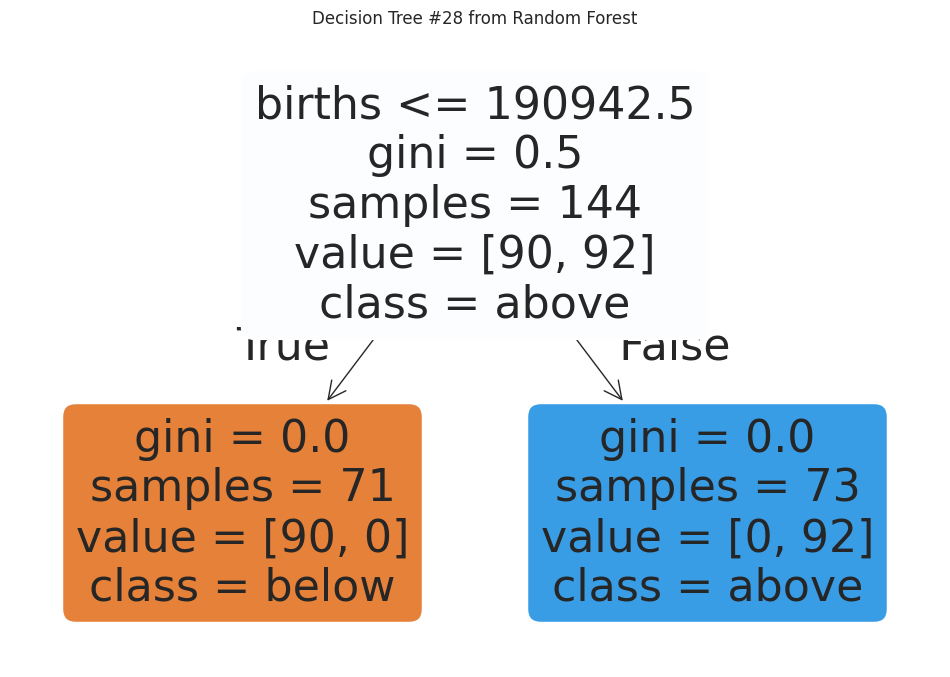

In [ ]:
#
# Visualizing one of the Random Forest's decision trees
#
tree_index = 28   # which tree to visualize (could be any index up to n_estimators-1)
one_rf_tree = rforest_model_tuned.estimators_[tree_index]
print(f"One of the forest's trees (index {tree_index}): {one_rf_tree}")

# Feature and class names for our births dataset
FEATURES = ['births']  # Our single feature
CLASS_NAMES = ['below', 'above']  # Corresponding to popularity 0 and 1

# Export the tree to a Graphviz file
filename = f'births_rf_tree_{tree_index:03d}.gv'
tree.export_graphviz(one_rf_tree,
                    out_file=filename,
                    feature_names=FEATURES,
                    filled=True,
                    rotate=False,
                    class_names=CLASS_NAMES,
                    leaves_parallel=True)

print(f"\nGraphviz file {filename} created. You can:")
print("Copy the contents to http://viz-js.com/")
print("\nFile contents:")
with open(filename, "r") as f:
    print(f.read())

# Plot the tree directly in matplotlib
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
tree.plot_tree(one_rf_tree,
              feature_names=FEATURES,
              class_names=CLASS_NAMES,
              filled=True,
              rounded=True)
plt.title(f"Decision Tree #{tree_index} from Random Forest", pad=20)
plt.show()

Testing the Random Forest model on example birth counts:

Birth count: 160,000 → Predicted: below median (0)
Birth count: 185,000 → Predicted: below median (0)
Birth count: 192,000 → Predicted: above median (1)
Birth count: 200,000 → Predicted: above median (1)
Birth count: 210,000 → Predicted: above median (1)
Birth count: 175,000 → Predicted: below median (0)
Birth count: 205,000 → Predicted: above median (1)

Finding approximate decision threshold:
Birth count: 190,000 → Prediction: 0
Birth count: 190,556 → Prediction: 0
Birth count: 191,111 → Prediction: 1
Birth count: 191,667 → Prediction: 1
Birth count: 192,222 → Prediction: 1
Birth count: 192,778 → Prediction: 1
Birth count: 193,333 → Prediction: 1
Birth count: 193,889 → Prediction: 1
Birth count: 194,444 → Prediction: 1
Birth count: 195,000 → Prediction: 1


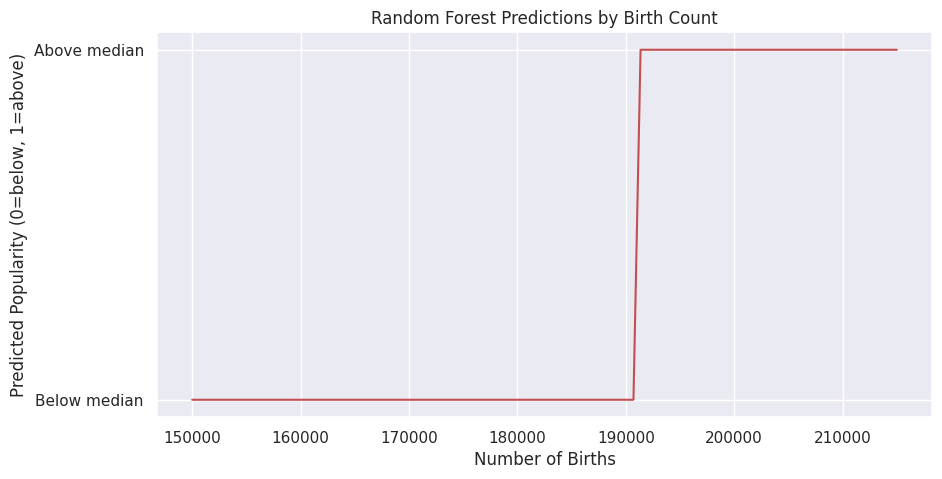

In [ ]:
#
# Final predictive model (random forests) for births data
#

def predictive_model(feature_value, model):
    """Input: a birth count (single value)
       Output: predicted popularity (0 = below median, 1 = above median)
    """
    # Convert input to numpy array with correct shape
    input_data = np.array([[feature_value]])
    prediction = model.predict(input_data)
    return int(prediction[0])  # Return 0 or 1

#
# Test the model with example birth counts
#

# Example test cases (some below median, some above)
test_cases = [
    160000,  # Clearly below median
    185000,  # Borderline below
    192000,  # Near median threshold
    200000,  # Clearly above median
    210000,  # Well above median
    175000,  # Well below median
    205000   # Well above median
]

print("Testing the Random Forest model on example birth counts:\n")
for birth_count in test_cases:
    prediction = predictive_model(birth_count, rforest_model_tuned)
    result = "below median (0)" if prediction == 0 else "above median (1)"
    print(f"Birth count: {birth_count:,} → Predicted: {result}")

# Additional analysis: Find the approximate decision threshold
print("\nFinding approximate decision threshold:")
threshold_tests = np.linspace(190000, 195000, 10)  # Test around the median area
for test_value in threshold_tests:
    prediction = predictive_model(test_value, rforest_model_tuned)
    print(f"Birth count: {test_value:,.0f} → Prediction: {prediction}")

# Visualize predictions across the range
import matplotlib.pyplot as plt

birth_range = np.linspace(150000, 215000, 100)
predictions = [predictive_model(x, rforest_model_tuned) for x in birth_range]

plt.figure(figsize=(10, 5))
plt.plot(birth_range, predictions, 'r-')
plt.title("Random Forest Predictions by Birth Count")
plt.xlabel("Number of Births")
plt.ylabel("Predicted Popularity (0=below, 1=above)")
plt.yticks([0, 1], ['Below median', 'Above median'])
plt.grid(True)
plt.show()